# `VibeFinder: Dataset Exploration and Content-Based Filtering`

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load the cleaned dataset
cleaned_data_path = 'data/cleaned_spotify_million_songs.csv'
data = pd.read_csv(cleaned_data_path)

# Load preprocessed features
features_path = 'data/preprocessed_features.npy'
features = np.load(features_path)

# Verify data and features
print("Cleaned Dataset Shape:", data.shape)
print("Features Shape:", features.shape)

Cleaned Dataset Shape: (57650, 6)
Features Shape: (57650, 303)


In [22]:
# Build a Content-Based Recommendation System
def recommend_songs(song_title, data, features, top_n=5):
    """Recommends songs based on content similarity."""
    try:
        # Find the index of the given song
        song_idx = data[data['song'] == song_title].index[0]

        # Compute cosine similarity between the song and all others
        similarity_scores = cosine_similarity([features[song_idx]], features)[0]

        # Get indices of the top_n similar songs (excluding itself)
        similar_indices = similarity_scores.argsort()[::-1][1:top_n + 1]

        # Retrieve and display recommended songs
        recommendations = data.iloc[similar_indices][['artist', 'song']]
        return recommendations
    except IndexError:
        return f"Song '{song_title}' not found in the dataset."

In [23]:
# Example: Recommend songs similar to a given title
song_to_recommend = "Andante, Andante"  # Replace with a song from the dataset
recommendations = recommend_songs(song_to_recommend, data, features, top_n=5)

print(f"\nSongs recommended for '{song_to_recommend}':\n", recommendations)


Songs recommended for 'Andante, Andante':
             artist                         song
91            ABBA      Thank You For The Music
85            ABBA                     Soldiers
22843  Ace Of Base                     Dead Mic
110           ABBA    When I Kissed The Teacher
83            ABBA  Slipping Through My Fingers


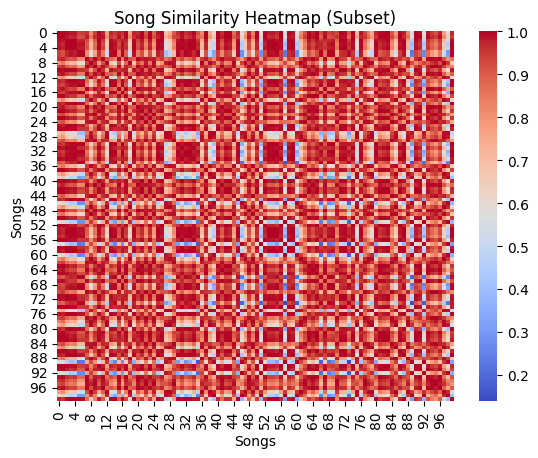

In [24]:
# Visualize Similarity Matrix for a Subset
subset_indices = np.random.choice(features.shape[0], size=100, replace=False)  # Randomly pick 100 songs
similarity_matrix = cosine_similarity(features[subset_indices])

sns.heatmap(similarity_matrix, cmap='coolwarm')
plt.title('Song Similarity Heatmap (Subset)')
plt.xlabel('Songs')
plt.ylabel('Songs')
plt.show()

In [25]:
# Save Recommendations (Optional for future use)
recommendations.to_csv('data/recommendations_example.csv', index=False)
print("Recommendations saved to 'data/recommendations_example.csv'")

Recommendations saved to 'data/recommendations_example.csv'
